In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_csv(file):
    # File locations
    log_path = "../build/apps/" + file

    csv_df = pd.read_csv(log_path)
    csv_df.columns = csv_df.columns.str.replace(" ","")

    return csv_df

In [55]:
# Load quadcopter state
x_df = load_csv("state_log.csv")
x_df.head()

,time,u,v,w,p,q,r,x,y,z,roll,pitch,yaw
0,0.00,0.000000,0.000000,-0.098802,-0.205761,-0.013765,0.028461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.01,-0.000014,0.000203,-0.053801,-0.167064,-0.194439,0.021337,0.000000,0.000000,-0.000988,-0.002058,-0.000138,0.000285
2,0.02,-0.000105,0.000091,-0.020378,-0.472569,-0.273818,-0.026010,-0.000000,0.000001,-0.001526,-0.003728,-0.002082,0.000502
3,0.03,0.000044,-0.000178,0.009614,-0.530389,-0.334531,-0.072524,-0.000001,0.000001,-0.001730,-0.008453,-0.004821,0.000252
4,0.04,0.000549,-0.001058,0.044256,-0.336690,-0.367506,0.022250,-0.000001,0.000000,-0.001634,-0.013754,-0.008172,-0.000445


In [56]:
x_df.columns

Index(['time', 'u', 'v', 'w', 'p', 'q', 'r', 'x', 'y', 'z', 'roll', 'pitch',
       'yaw'],
      dtype='object')

In [57]:
# Time
t_df = x_df['time']
t = t_df.to_numpy()

# Height DF -> Numpy
z_df = x_df['z']
z_np = z_df.to_numpy()

# Roll / Pitch / Yaw - DF -> Numpy
rpy_df = x_df[['roll','pitch','yaw']]
rpy_np = rpy_df.to_numpy()

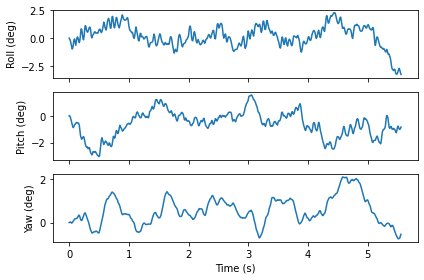

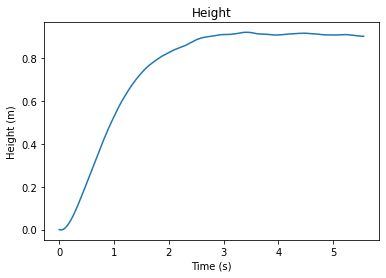

In [58]:
# Plotting indices
idx_start = 0
idx_end = np.size(t)#1000

# Clip variables
t_clip = t[idx_start:idx_end]
z = z_np[idx_start:idx_end]
roll = rpy_np[idx_start:idx_end, 0]
pitch = rpy_np[idx_start:idx_end, 1]
yaw = rpy_np[idx_start:idx_end, 2]

# Convert RPY to degrees
roll = np.degrees(roll)
pitch = np.degrees(pitch)
yaw = np.degrees(yaw)


# Plotting RPY
f, axs = plt.subplots(3, sharex=True)

axs[0].plot(t_clip, roll)
axs[0].set_ylabel("Roll (deg)")

axs[1].plot(t_clip, pitch)
axs[1].set_ylabel("Pitch (deg)")

axs[2].plot(t_clip, yaw)
axs[2].set_ylabel("Yaw (deg)")
axs[2].set_xlabel("Time (s)")

f.tight_layout()

plt.show()

# Plotting height
plt.plot(t_clip, z)
plt.title("Height")
plt.ylabel("Height (m)")
plt.xlabel("Time (s)")
plt.show()


# Control Effort

In [59]:
# Load motor throttle
motor_df = load_csv("ctrl_log.csv")

In [49]:
# Get motor data
t_mot = motor_df['time']
t_mot = t_mot.to_numpy()

motor_np = motor_df[['motor_fr', 'motor_bl', 'motor_fl', 'motor_br']].to_numpy()

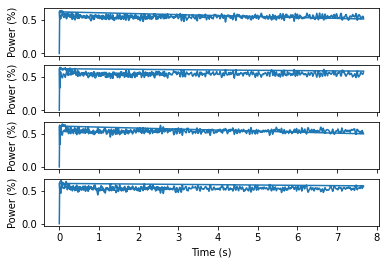

In [41]:
# Clip to the boundaries

t_mot_clip = t_mot[idx_start:idx_end]
motor_clip = motor_np[idx_start:idx_end,:]

f, axs = plt.subplots(4, sharex=True)
for i in range(4):
    axs[i].plot(t_mot_clip, motor_clip[:,i])
    axs[i].set_ylabel("Power (%)")
    
axs[3].set_xlabel("Time (s)")
plt.show()

In [43]:
np.max(t)

7.67